In [2]:
# Data analysis tools
import pandas as pd
import numpy as np

# Data Visualization Tools
import seaborn as sns
import matplotlib.pyplot as plt

# Data Pre-Processing Libraries
from sklearn.preprocessing import LabelEncoder,StandardScaler

# For Train-Test Split
from sklearn.model_selection import train_test_split

# Libraries for various Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
# Metrics Tools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score
#For Receiver Operating Characteristic (ROC)
from sklearn.metrics import roc_curve ,roc_auc_score, auc


In [3]:
match=pd.read_csv(r"C:\Users\ABI PRIYANKA\Downloads\IPL Matches 2008-2020.csv")

In [4]:
match.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [5]:
match_data = match.loc[(match.team1== "Chennai Super Kings") | (match.team2 == "Chennai Super Kings")]

In [6]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 808
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               178 non-null    int64  
 1   city             175 non-null    object 
 2   date             178 non-null    object 
 3   player_of_match  178 non-null    object 
 4   venue            178 non-null    object 
 5   neutral_venue    178 non-null    int64  
 6   team1            178 non-null    object 
 7   team2            178 non-null    object 
 8   toss_winner      178 non-null    object 
 9   toss_decision    178 non-null    object 
 10  winner           178 non-null    object 
 11  result           178 non-null    object 
 12  result_margin    177 non-null    float64
 13  eliminator       178 non-null    object 
 14  method           4 non-null      object 
 15  umpire1          178 non-null    object 
 16  umpire2          178 non-null    object 
dtypes: float64(1), i

In [7]:
# Convert 'date' column to a usable format
match_data['date'] = pd.to_datetime(match['date'])

C:\Users\ABI PRIYANKA\AppData\Local\Temp\ipykernel_2296\1663831285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_data['date'] = pd.to_datetime(match['date'])


In [8]:
# Extract the year from the 'date' column
match_data['season'] = match_data['date'].dt.year

# Count the matches played in each season
matches_per_season = match_data['season'].value_counts()

print("Matches played in each season:")
print(matches_per_season)

Matches played in each season:
2012    18
2013    18
2015    17
2019    17
2008    16
2010    16
2011    16
2014    16
2018    16
2009    14
2020    14
Name: season, dtype: int64


C:\Users\ABI PRIYANKA\AppData\Local\Temp\ipykernel_2296\3427617394.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  match_data['season'] = match_data['date'].dt.year


In [9]:
len(np.unique(match_data['id']))

178

In [10]:
match_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 178 entries, 1 to 808
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               178 non-null    int64         
 1   city             175 non-null    object        
 2   date             178 non-null    datetime64[ns]
 3   player_of_match  178 non-null    object        
 4   venue            178 non-null    object        
 5   neutral_venue    178 non-null    int64         
 6   team1            178 non-null    object        
 7   team2            178 non-null    object        
 8   toss_winner      178 non-null    object        
 9   toss_decision    178 non-null    object        
 10  winner           178 non-null    object        
 11  result           178 non-null    object        
 12  result_margin    177 non-null    float64       
 13  eliminator       178 non-null    object        
 14  method           4 non-null      object   

In [11]:
match_data['winner'].value_counts()

Chennai Super Kings            106
Mumbai Indians                  18
Rajasthan Royals                 9
Royal Challengers Bangalore      9
Kings XI Punjab                  9
Kolkata Knight Riders            8
Delhi Daredevils                 6
Deccan Chargers                  4
Sunrisers Hyderabad              4
Pune Warriors                    2
Delhi Capitals                   2
Kochi Tuskers Kerala             1
Name: winner, dtype: int64

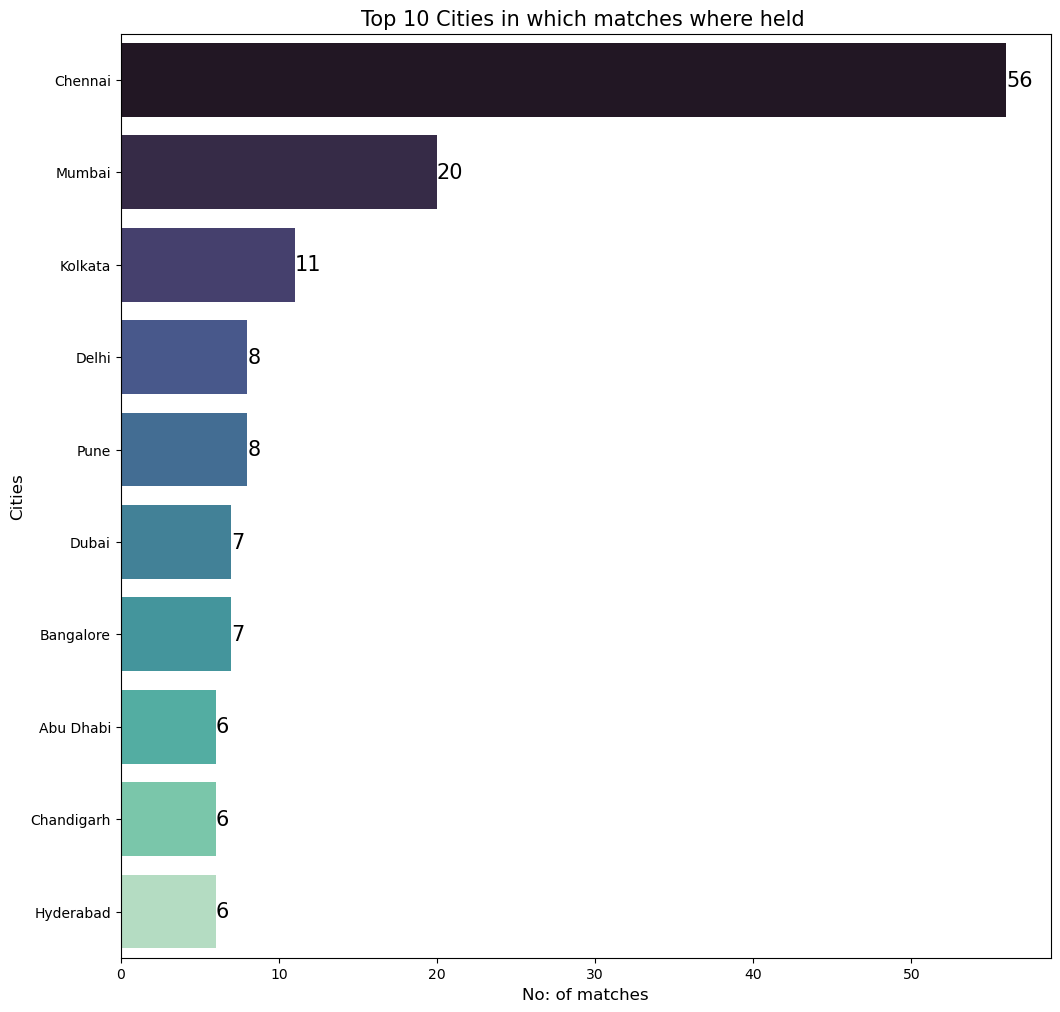

In [12]:
cities = match_data['city'].value_counts().head(10)
plt.figure(figsize=(12,12))
c1 = sns.countplot(y= 'city',order=match_data['city'].value_counts().iloc[:10].index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Cities',fontsize=12)
plt.xlabel('No: of matches',fontsize=12)
plt.title('Top 10 Cities in which matches where held ',fontsize=15)
plt.show()

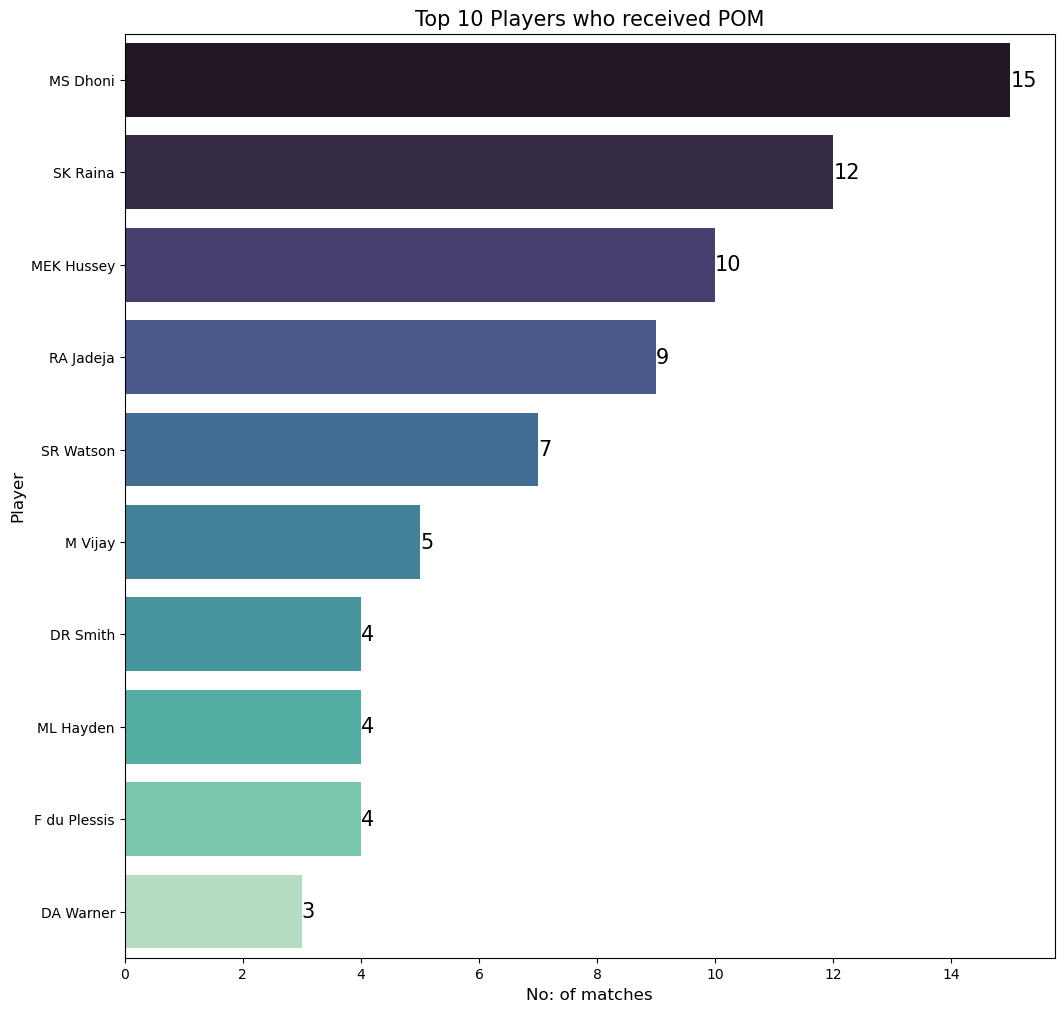

In [13]:
pom = match_data['player_of_match'].value_counts().iloc[:10]
plt.figure(figsize=(12,12))
c1 = sns.countplot(y= 'player_of_match',order=pom.index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Player',fontsize=12)
plt.xlabel('No: of matches',fontsize=12)
plt.title('Top 10 Players who received POM',fontsize=15)
plt.show()

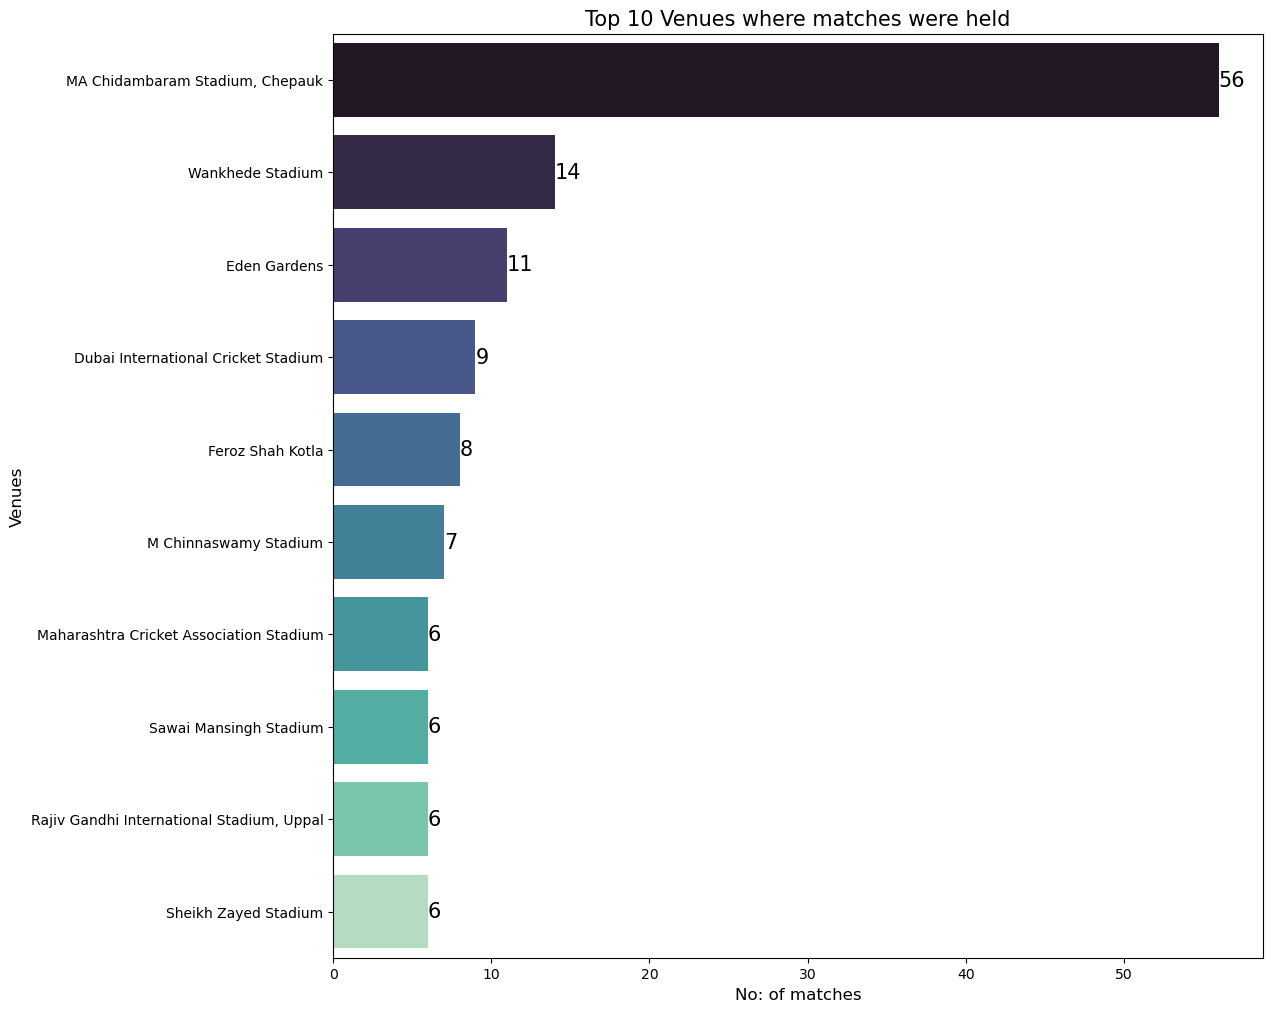

In [14]:
venues = match_data['venue'].value_counts().head(10)
plt.figure(figsize=(12,12))
c1 = sns.countplot(y='venue',order=venues.index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Venues',fontsize=12)
plt.xlabel('No: of matches',fontsize=12)
plt.title('Top 10 Venues where matches were held',fontsize=15)
plt.show()

In [15]:
match_app=pd.concat([match_data['team1'],match_data['team2']])
match_app=match_app.value_counts().reset_index()
match_app.columns=['Team','Total Matches']
match_app

,Team,Total Matches
0,Chennai Super Kings,178
1,Mumbai Indians,30
2,Royal Challengers Bangalore,25
3,Kings XI Punjab,23
4,Rajasthan Royals,23
5,Kolkata Knight Riders,22
6,Delhi Daredevils,18
7,Sunrisers Hyderabad,14
8,Deccan Chargers,10
9,Pune Warriors,6


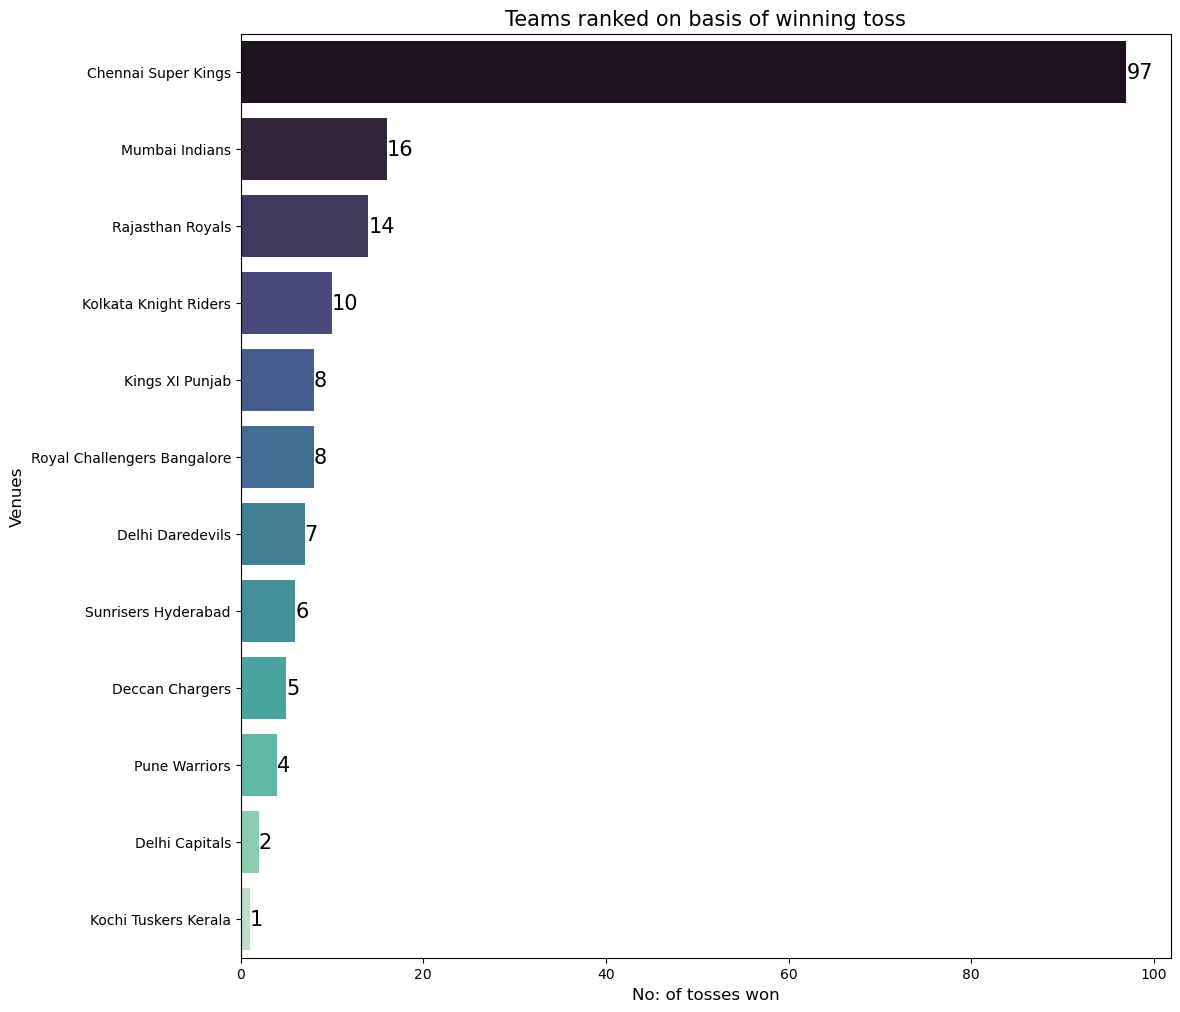

In [16]:
toss_wins = match_data['toss_winner'].value_counts()
plt.figure(figsize=(12,12))
c1 = sns.countplot(y='toss_winner',order=toss_wins.index,data = match_data,palette = 'mako')
c1.bar_label(c1.containers[0],size = 15)
plt.ylabel('Venues',fontsize=12)
plt.xlabel('No: of tosses won',fontsize=12)
plt.title('Teams ranked on basis of winning toss',fontsize=15)
plt.show()

Count of CSK winning the toss and winning the match: 61
Count of CSK winning the toss but losing the match: 36


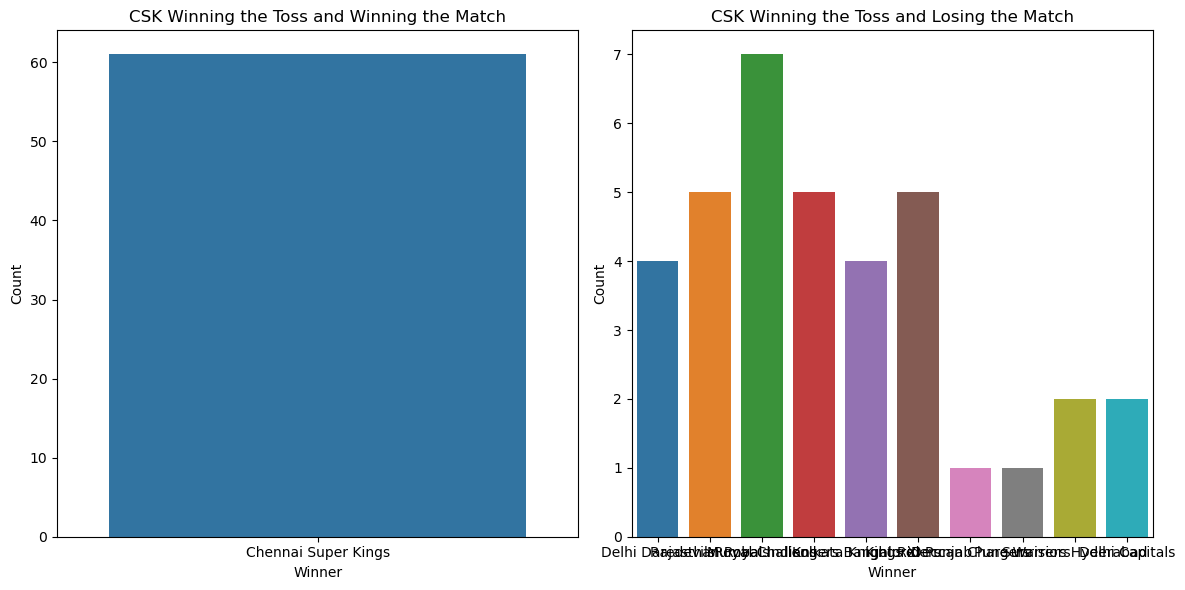

In [17]:


# Filter data for CSK matches where CSK won the toss and won the match
csk_won_toss_won_match = match_data[(match_data['toss_winner'] == 'Chennai Super Kings') & (match_data['winner'] == 'Chennai Super Kings')]

# Filter data for CSK matches where CSK won the toss but lost the match
csk_won_toss_lost_match = match_data[(match_data['toss_winner'] == 'Chennai Super Kings') & (match_data['winner'] != 'Chennai Super Kings')]

# Create subplots to display both countplots side by side
plt.figure(figsize=(12, 6))

# Plot for CSK winning the toss and winning the match
plt.subplot(1, 2, 1)
sns.countplot(x='winner', data=csk_won_toss_won_match)
plt.title('CSK Winning the Toss and Winning the Match')
plt.xlabel('Winner')
plt.ylabel('Count')

# Count the instances of CSK winning the toss and winning the match
csk_won_match_count = csk_won_toss_won_match.shape[0]
print("Count of CSK winning the toss and winning the match:", csk_won_match_count)

# Plot for CSK winning the toss and losing the match
plt.subplot(1, 2, 2)
sns.countplot(x='winner', data=csk_won_toss_lost_match)
plt.title('CSK Winning the Toss and Losing the Match')
plt.xlabel('Winner')
plt.ylabel('Count')

# Count the instances of CSK winning the toss but losing the match
csk_lost_match_count = csk_won_toss_lost_match.shape[0]
print("Count of CSK winning the toss but losing the match:", csk_lost_match_count)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [18]:
##Classification algorithms

In [22]:
# Encoding categorical variables using one-hot encoding
match_encoded = pd.get_dummies(match_data, columns=['city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'venue'])

In [24]:
match_encoded

,id,date,player_of_match,neutral_venue,winner,result,result_margin,eliminator,method,umpire1,...,"venue_Sardar Patel Stadium, Motera",venue_Sawai Mansingh Stadium,venue_Shaheed Veer Narayan Singh International Stadium,venue_Sharjah Cricket Stadium,venue_Sheikh Zayed Stadium,venue_St George's Park,venue_Subrata Roy Sahara Stadium,venue_SuperSport Park,"venue_Vidarbha Cricket Association Stadium, Jamtha",venue_Wankhede Stadium
1,335983,2008-04-19,MEK Hussey,0,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,...,0,0,0,0,0,0,0,0,0,0
7,335989,2008-04-23,ML Hayden,0,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,...,0,0,0,0,0,0,0,0,0,0
11,335993,2008-04-26,JDP Oram,0,Chennai Super Kings,wickets,9.0,N,NaN,BF Bowden,...,0,0,0,0,0,0,0,0,0,0
14,335996,2008-04-28,MS Dhoni,0,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,...,0,0,0,0,0,0,0,0,0,0
19,336001,2008-05-02,V Sehwag,0,Delhi Daredevils,wickets,8.0,N,NaN,BF Bowden,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
792,1216528,2020-10-13,RA Jadeja,0,Chennai Super Kings,runs,20.0,N,NaN,AK Chaudhary,...,0,0,0,0,0,0,0,0,0,0
797,1216533,2020-10-19,JC Buttler,0,Rajasthan Royals,wickets,7.0,N,NaN,CB Gaffaney,...,0,0,0,0,1,0,0,0,0,0
800,1216536,2020-10-29,RD Gaikwad,0,Chennai Super Kings,wickets,6.0,N,NaN,C Shamshuddin,...,0,0,0,0,0,0,0,0,0,0
803,1216539,2020-09-25,PP Shaw,0,Delhi Capitals,runs,44.0,N,NaN,KN Ananthapadmanabhan,...,0,0,0,0,0,0,0,0,0,0


In [32]:
# Create a binary encoding for the target variable 'y'
y = match_encoded['winner'].apply(lambda x: 1 if x == 'Chennai Super Kings' else 0)

# Drop the 'winner' column from the feature matrix 'X'
X = match_encoded.drop(columns=['id', 'date', 'player_of_match', 'winner', 'method', 'umpire1','umpire2'])

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(X)

# Handle missing values (if any)
X.fillna(0, inplace=True)  # Replace missing values with 0, assuming 0 is not a valid value in the dataset

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Classifier with the best hyperparameters from the previous step
rf_classifier = RandomForestClassifier(n_estimators=150, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model using all features
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy and print classification report
accuracy_all_features = accuracy_score(y_test, y_pred)
print("Accuracy with all features:", accuracy_all_features)

print("Classification Report with all features:")
print(classification_report(y_test, y_pred))

# Find feature importances
feature_importances = rf_classifier.feature_importances_

# Create a DataFrame to show feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

# Drop the least impactful variable
least_impactful_variable = importance_df.iloc[-1]['Feature']
X_train_reduced = X_train.drop(columns=[least_impactful_variable])
X_test_reduced = X_test.drop(columns=[least_impactful_variable])

# Retrain the model without the least impactful variable
rf_classifier_reduced = RandomForestClassifier(n_estimators=150, max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
rf_classifier_reduced.fit(X_train_reduced, y_train)

# Predict on the test set using the reduced feature set
y_pred_reduced = rf_classifier_reduced.predict(X_test_reduced)

# Calculate accuracy and print classification report with reduced features
accuracy_reduced_features = accuracy_score(y_test, y_pred_reduced)
print("Accuracy with reduced features:", accuracy_reduced_features)

print("Classification Report with reduced features:")
print(classification_report(y_test, y_pred_reduced))

Accuracy with all features: 0.4166666666666667
Classification Report with all features:
              precision    recall  f1-score   support

           0       0.38      0.16      0.22        19
           1       0.43      0.71      0.53        17

    accuracy                           0.42        36
   macro avg       0.40      0.43      0.38        36
weighted avg       0.40      0.42      0.37        36

Feature Importances:
                         Feature  Importance
1                  result_margin    0.087353
2                         season    0.058162
31     team1_Chennai Super Kings    0.026270
43     team2_Chennai Super Kings    0.025169
38          team1_Mumbai Indians    0.021241
..                           ...         ...
87                venue_Newlands    0.000000
176            umpire2_SS Hazare    0.000000
177       umpire2_TH Wijewardene    0.000000
7                 city_Cape Town    0.000000
72   venue_De Beers Diamond Oval    0.000000

[181 rows x 2 columns]


In [34]:

# Initialize the Decision Tree Classifier with the best hyperparameters (you can tune these as well)
dt_classifier = DecisionTreeClassifier(max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)

# Train the model using all features
dt_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = dt_classifier.predict(X_test)

# Calculate accuracy and print classification report
accuracy_all_features = accuracy_score(y_test, y_pred)
print("Accuracy with all features:", accuracy_all_features)

print("Classification Report with all features:")
print(classification_report(y_test, y_pred))

# Find feature importances (not available in DecisionTreeClassifier, but you can still get the most important feature)
most_important_variable = X_train.columns[dt_classifier.feature_importances_.argmax()]
print("Most important variable:", most_important_variable)

# Drop the most impactful variable (in this case, we are dropping the most important variable for illustration)
X_train_reduced = X_train.drop(columns=[most_important_variable])
X_test_reduced = X_test.drop(columns=[most_important_variable])

# Retrain the model without the most impactful variable
dt_classifier_reduced = DecisionTreeClassifier(max_depth=20, min_samples_split=2, min_samples_leaf=1, random_state=42)
dt_classifier_reduced.fit(X_train_reduced, y_train)

# Predict on the test set using the reduced feature set
y_pred_reduced = dt_classifier_reduced.predict(X_test_reduced)

# Calculate accuracy and print classification report with reduced features
accuracy_reduced_features = accuracy_score(y_test, y_pred_reduced)
print("Accuracy with reduced features:", accuracy_reduced_features)

print("Classification Report with reduced features:")
print(classification_report(y_test, y_pred_reduced))


Accuracy with all features: 0.5
Classification Report with all features:
              precision    recall  f1-score   support

           0       0.55      0.32      0.40        19
           1       0.48      0.71      0.57        17

    accuracy                           0.50        36
   macro avg       0.51      0.51      0.49        36
weighted avg       0.51      0.50      0.48        36

Most important variable: result_margin
Accuracy with reduced features: 0.5555555555555556
Classification Report with reduced features:
              precision    recall  f1-score   support

           0       0.60      0.47      0.53        19
           1       0.52      0.65      0.58        17

    accuracy                           0.56        36
   macro avg       0.56      0.56      0.55        36
weighted avg       0.56      0.56      0.55        36



In [35]:
# Initialize the Logistic Regression model
logreg_classifier = LogisticRegression(random_state=42)

# Train the model using all features
logreg_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg_classifier.predict(X_test)

# Calculate accuracy and print classification report
accuracy_all_features = accuracy_score(y_test, y_pred)
print("Accuracy with all features:", accuracy_all_features)

print("Classification Report with all features:")
print(classification_report(y_test, y_pred))

# Find feature importances (not available in Logistic Regression)
# We can print the coefficients as a measure of feature importance
coefficients = logreg_classifier.coef_[0]
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Coefficient': coefficients})
importance_df = importance_df.sort_values(by='Coefficient', ascending=False)

print("Feature Importances:")
print(importance_df)

# Drop the least impactful variable (the one with the smallest absolute coefficient)
least_impactful_variable = importance_df.iloc[-1]['Feature']
X_train_reduced = X_train.drop(columns=[least_impactful_variable])
X_test_reduced = X_test.drop(columns=[least_impactful_variable])

# Retrain the model without the least impactful variable
logreg_classifier_reduced = LogisticRegression(random_state=42)
logreg_classifier_reduced.fit(X_train_reduced, y_train)

# Predict on the test set using the reduced feature set
y_pred_reduced = logreg_classifier_reduced.predict(X_test_reduced)

# Calculate accuracy and print classification report with reduced features
accuracy_reduced_features = accuracy_score(y_test, y_pred_reduced)
print("Accuracy with reduced features:", accuracy_reduced_features)

print("Classification Report with reduced features:")
print(classification_report(y_test, y_pred_reduced))


Accuracy with all features: 0.4444444444444444
Classification Report with all features:
              precision    recall  f1-score   support

           0       0.44      0.21      0.29        19
           1       0.44      0.71      0.55        17

    accuracy                           0.44        36
   macro avg       0.44      0.46      0.42        36
weighted avg       0.44      0.44      0.41        36

Feature Importances:
                           Feature  Coefficient
107              umpire1_Aleem Dar     0.885305
52          team2_Rajasthan Royals     0.880253
148           umpire2_BNJ Oxenford     0.856349
31       team1_Chennai Super Kings     0.690740
64    toss_winner_Rajasthan Royals     0.609264
..                             ...          ...
118        umpire1_HDPK Dharmasena    -0.675937
43       team2_Chennai Super Kings    -0.688499
123  umpire1_KN Ananthapadmanabhan    -0.769327
38            team1_Mumbai Indians    -0.781190
62      toss_winner_Mumbai Indians  

C:\Users\ABI PRIYANKA\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ABI PRIYANKA\anaconda4\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

In [40]:
# Initialize the KNN classifier
knn_classifier = KNeighborsClassifier()

# Train the model using all features
knn_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = knn_classifier.predict(X_test)

# Calculate accuracy and print classification report
accuracy_all_features = accuracy_score(y_test, y_pred)
print("Accuracy with all features:", accuracy_all_features)

print("Classification Report with all features:")
print(classification_report(y_test, y_pred))

Accuracy with all features: 0.5277777777777778
Classification Report with all features:
              precision    recall  f1-score   support

           0       0.62      0.26      0.37        19
           1       0.50      0.82      0.62        17

    accuracy                           0.53        36
   macro avg       0.56      0.54      0.50        36
weighted avg       0.57      0.53      0.49        36

